In [285]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Импортируем нужные библиотеки

Считываем данные, делаем их более удобными для работы

In [292]:
df = pd.read_excel(r"C:\Users\iRU\Desktop\200_выпусков_'О_мой_питч!'_OutOfScope_update.xlsx", sheet_name='Лист2')
df = df.rename(columns={'Инвестиции' : 'Инвестиции(руб)', 'Без' : 'Воздержалось'})
df['За'] = pd.to_numeric(df['За'], errors='coerce')
df['Против'] = pd.to_numeric(df['Против'], errors='coerce')
df['Воздержалось'] = pd.to_numeric(df['Воздержалось'], errors='coerce')
df = df.drop(columns='№')
df = df.drop(index=82) #Дропаем строку в бизнесом, о котором нет данных
df = df.drop_duplicates(subset='Название')

Информация о типах данных в нашем датафрейме

In [286]:
df.dtypes

Название                   object
Описание                   object
Сайт                       object
Инвестиции(руб)             int64
За                          int64
Против                      int64
Воздержалось              float64
Всего                       int64
Дата               datetime64[ns]
dtype: object

In [287]:
df.loc[123]

Название                                                        Pick
Описание           Сервис бесконтактного заказа еды навынос из ре...
Сайт                                            https://thepick.app/
Инвестиции(руб)                                              6750000
За                                                               196
Против                                                           140
Воздержалось                                                   100.0
Всего                                                            436
Дата                                             2021-03-11 00:00:00
Name: 123, dtype: object

Общие метрики

In [288]:
SUM_invest = int(df['Инвестиции(руб)'].sum())
SUM_pros = int(df['За'].sum())
SUM_cons = int(df['Против'].sum())
SUM_abstained = int(df['Воздержалось'].sum())
SUM_voice = int(df['Всего'].sum())

MEAN_invest = int(df['Инвестиции(руб)'].mean())
MEAN_pros = int(df['За'].mean())
MEAN_cons = int(df['Против'].mean())
MEAN_abstained = int(df['Воздержалось'].mean())
MEAN_voice = int(df['Всего'].mean())

MIN_invest = int(df['Инвестиции(руб)'].min())
MIN_pros = int(df['За'].min())
MIN_cons = int(df['Против'].min())
MIN_abstained = int(df['Воздержалось'].min())
MIN_voice = int(df['Всего'].min())

MAX_invest = int(df['Инвестиции(руб)'].max())
MAX_pros = int(df['За'].max())
MAX_cons = int(df['Против'].max())
MAX_abstained = int(df['Воздержалось'].max())
MAX_voice = int(df['Всего'].max())

График, показывающий зависимость голосов от года за все время

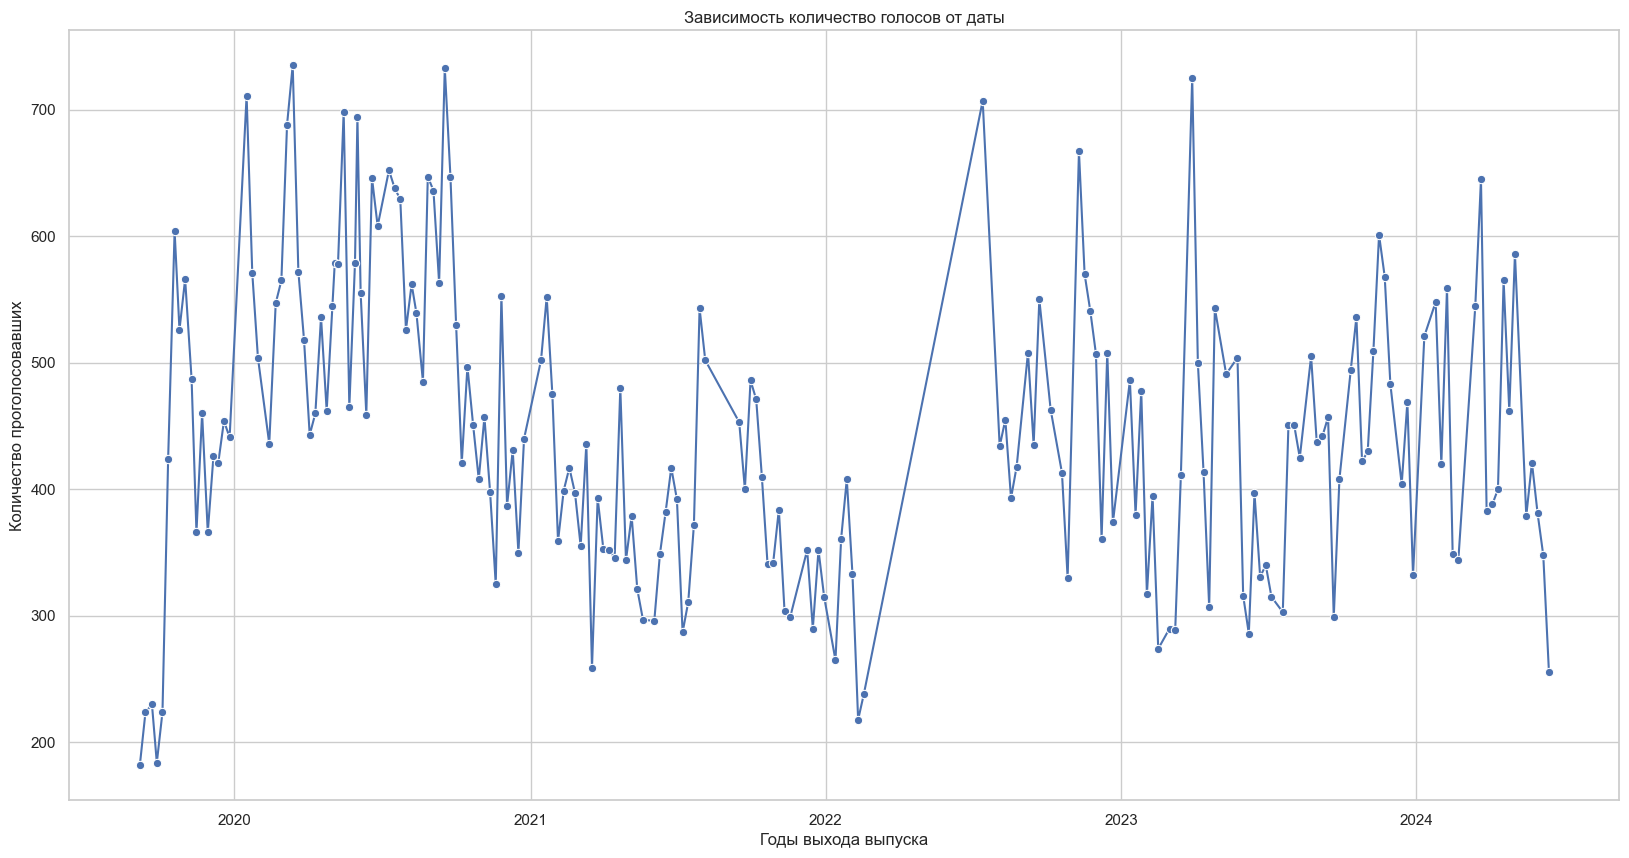

In [302]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))
sns.lineplot(x='Дата', y='Всего', data=df, marker='o', color='b')


plt.xlabel('Годы выхода выпуска')
plt.ylabel('Количество проголосовавших')
plt.title('Зависимость количество голосов от даты')
plt.show()

Считаем скользящее среднее, чтобы уменьшить шум и нагляднее видеть выбросы

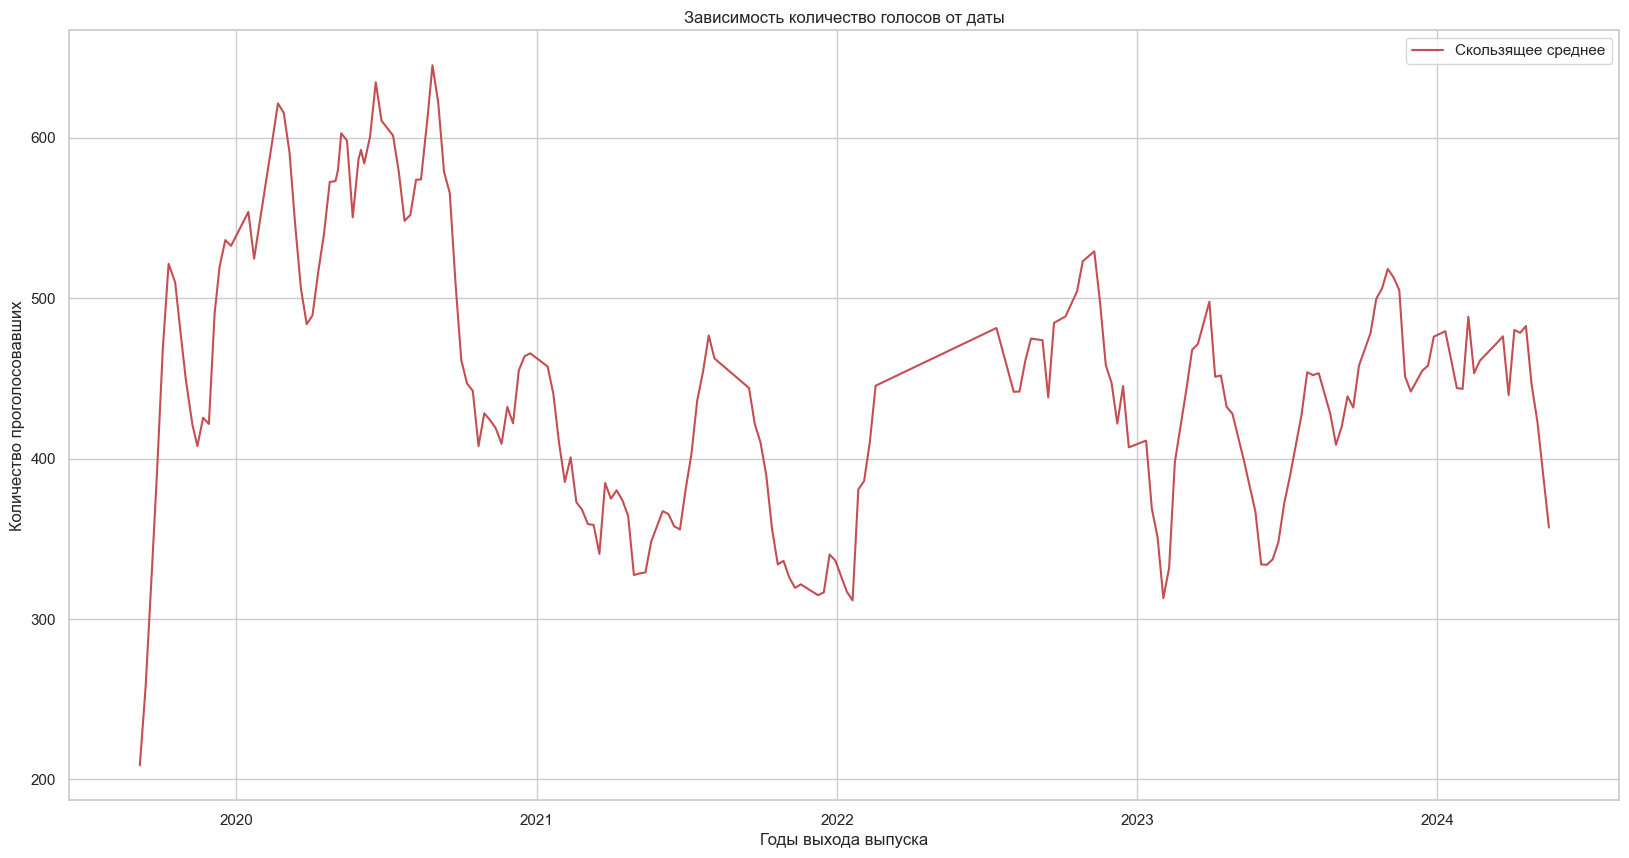

In [303]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))

df['Всего_rolling'] = df['Всего'].rolling(window=5).mean()
sns.lineplot(x='Дата', y='Всего_rolling', data=df, color='r', label='Скользящее среднее')

plt.xlabel('Годы выхода выпуска')
plt.ylabel('Количество проголосовавших')
plt.title('Зависимость количество голосов от даты')
plt.show()




Разбивка стартапов по группам

Для разбивки используются ключевые слова, которые наиболее подходят для выбраной категории

In [304]:
keywords = {
    'IT': ['код', 'хак', 'it', 'ai', 'програм', 'разработ', 'кибер', 'искусствен', 'база', 'веб', 'web', 'аналитик', 'мобиль', 'приложен'],
    'Фрилансеры': ['фриланс', 'удален', 'самозанят'],
    'Бизнес' : ['бизнес', 'цен', 'маркетинг', 'бренд', 'аналитик', 'seo', 'smm', 'management'],
    'Медицина' : ['диагностик ', 'профилактик', 'медицин', 'врач', 'докт', 'хирург ', 'операц', 'ология', 'маломобильных', 'процедур'],
    'Студенчество': ['студент', 'университет', 'школ', 'образован', 'универ', 'экзамен', 'курс', 'общежит'],
    
    'Музыка': ['музык', 'концерт', 'песн', 'звук', 'жанр', 'аккорд', 'мелод'],
    'Спорт': ['спорт', 'тренировк', 'фитнес', 'здоровь', 'физкультур', 'атлетик', 'кардио', 'нагруз', 'сорев', 'экипир'],
    
    
    'Автомобили и транспорт': ['ремонт', 'машин', 'диагностик', 'техобслуж', 'кузов', 'запчаст'],
    'Поездки, путешествия по России': ['поездк', 'туризм', 'путешеств', 'Росси', 'путевк', 'экскурс', 'курорт', 'проживание'],
    'Кулинария': ['кухн', 'повар', 'еда', 'готовит', 'пищ', 'рецепт', 'ингредиент', 'блюд'],
    
    
}

def categorize(description):
    matched_categories = []
    for category, words in keywords.items():
        if any(word in description.lower() for word in words):
            matched_categories.append(category)
    return ', '.join(matched_categories) if matched_categories else 'Не определено'

# Пример датафрейма
df['Категория'] = df['Описание'].apply(categorize)

# Вывести результат
df['Категория'].unique()

array(['Бизнес', 'IT, Медицина', 'IT, Бизнес',
       'Бизнес, Автомобили и транспорт', 'IT', 'Не определено', 'Музыка',
       'Бизнес, Медицина', 'Медицина',
       'Бизнес, Спорт, Автомобили и транспорт',
       'IT, Бизнес, Студенчество', 'Студенчество', 'IT, Спорт',
       'IT, Кулинария',
       'IT, Бизнес, Студенчество, Поездки, путешествия по России',
       'Фрилансеры, Бизнес', 'Спорт', 'Медицина, Автомобили и транспорт',
       'Бизнес, Спорт', 'Бизнес, Кулинария',
       'IT, Бизнес, Автомобили и транспорт', 'Кулинария',
       'Поездки, путешествия по России', 'Бизнес, Медицина, Кулинария',
       'Бизнес, Студенчество, Спорт', 'IT, Автомобили и транспорт',
       'IT, Бизнес, Кулинария', 'IT, Бизнес, Спорт, Кулинария',
       'Автомобили и транспорт', 'Музыка, Спорт',
       'IT, Студенчество, Поездки, путешествия по России',
       'Бизнес, Студенчество', 'IT, Студенчество',
       'IT, Медицина, Автомобили и транспорт',
       'Медицина, Студенчество, Спорт, Кулинария'

Группируем получившиеся данные по уникальным комбинациям категорий, сортируем по убыванию для выявления наиболее популярных категорий

In [305]:
groups_count = df.groupby('Категория', as_index=False).agg({'Название' : 'count'})
groups_count.sort_values(by = 'Название', ascending=False)

,Категория,Название
32,Не определено,54
0,IT,31
2,"IT, Бизнес",21
17,Бизнес,20
13,"IT, Спорт",6
33,"Поездки, путешествия по России",6
10,"IT, Медицина",6
26,Кулинария,4
27,Медицина,4
9,"IT, Кулинария",4


Визуализируем данные для большей наглядности

Таким образом, почти половина стартапов (49.3 %) - IT и Бизнес

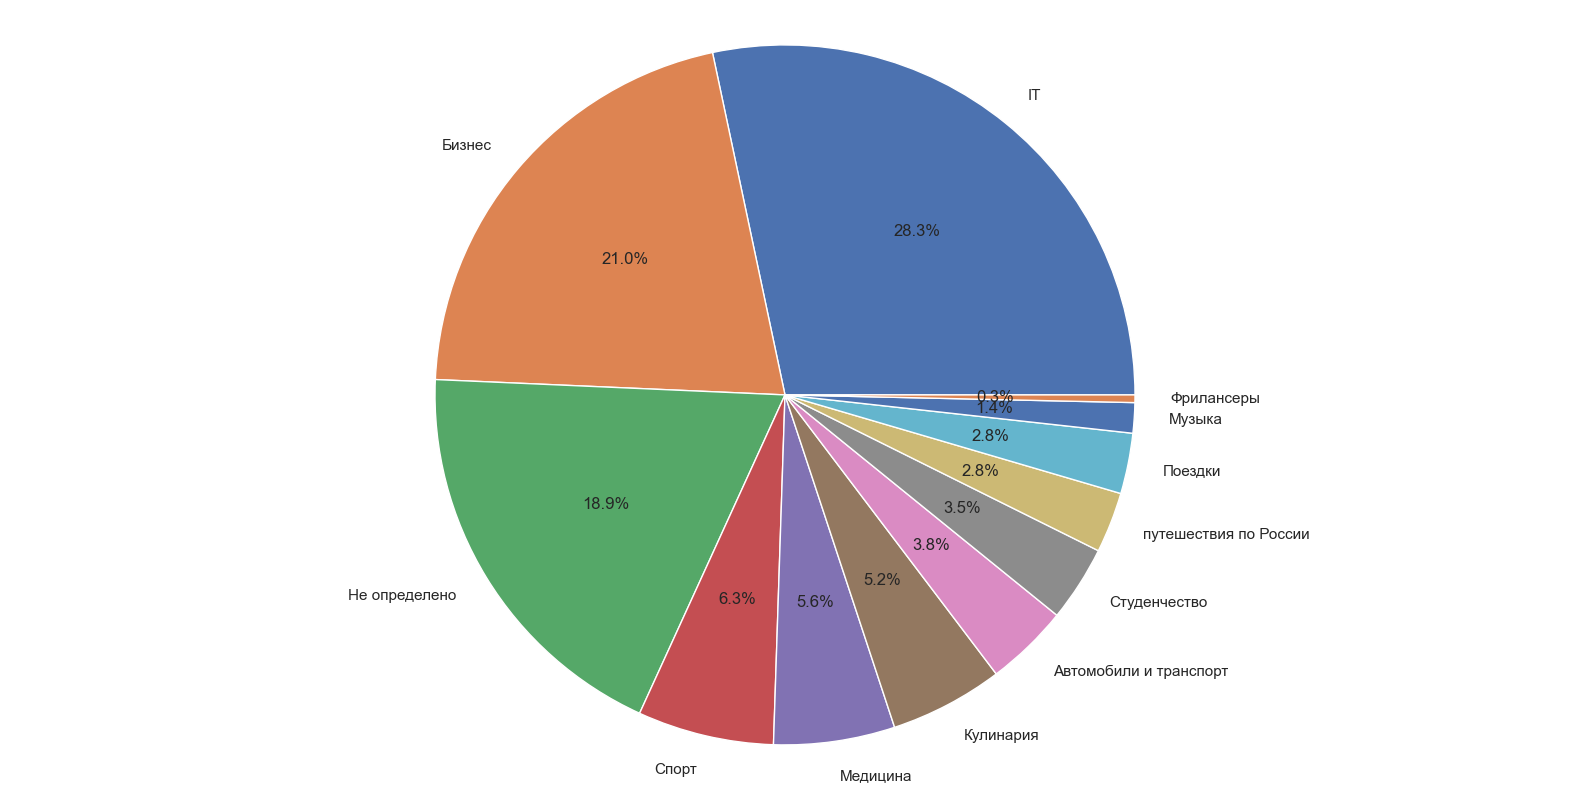

In [301]:
categories = df['Категория'].str.split(', ', expand=True)
categories = categories.melt(value_name='Категория').dropna()['Категория']

# Подсчет частоты каждой уникальной категории
category_counts = categories.value_counts()


# Создание круговой диаграммы
plt.figure(figsize=(20, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


In [298]:
df[df['Категория'] == 'Медицина']

,Название,Описание,Сайт,Инвестиции(руб),За,Против,Воздержалось,Всего,Дата,Категория
17,AsiliscMed AI,Первый медицинский ИИ для 100% контроля забол...,https://asilisc.com/,0,100,165,155.0,420,2024-02-01,Медицина
64,Medime,Мы создаем маркетплейс для медицинских и бьюти...,https://medime.pw/,13500000,86,139,149.0,374,2022-12-22,Медицина
183,Pharmedu,Информационно-образовательное сообщество фарма...,https://pharmedu.ru/,100000000,113,328,NaN,441,2019-12-26,Медицина
190,ip3 XRM (RoboSale),Мы делаем сервис по роботизации операций менед...,http://ip3.ru/,20000000,182,305,NaN,487,2019-11-09,Медицина
